In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
FOLDER = "out/precision-loo"
OUT = "out/precision-beta-reg"
DATA_BASE = ["Chembl28CCandD-loocv", "global-loocv", "e-loocv", "gpcr-loocv", "ic-loocv", "nr-loocv"]
FINGERPRINTS = ["ecfp4", "fcfp4", "maccs"]

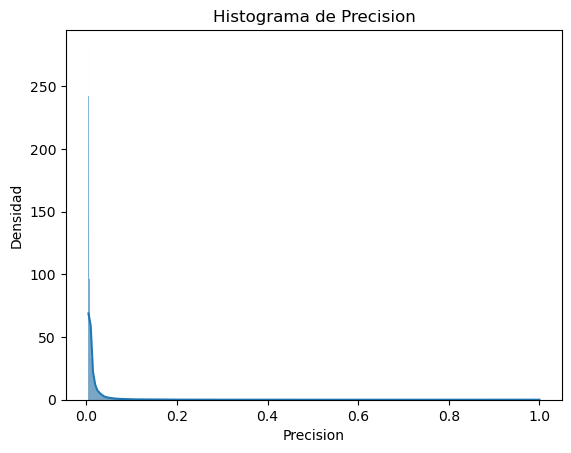

In [9]:
file_path = f"{OUT}/Chembl28CCandD-loocv_ecfp4_for_beta_reg.csv"
df = pd.read_csv(file_path)

sns.histplot(df['Precision'], kde=True, stat='density')
plt.title('Histograma de Precision')
plt.xlabel('Precision')
plt.ylabel('Densidad')
plt.show()

In [14]:
from scipy import stats

alpha, beta, loc, scale = stats.beta.fit(df['Precision'], floc=0, fscale=1)

# Kolmogorov-Smirnov
ks_stat, ks_p_value = stats.kstest(df['Precision'], 'beta', args=(alpha, beta, 0, 1))

print(f"dist Beta: a={alpha}, b={beta}")
print(f"pvalue deKS: {ks_p_value}")

dist Beta: a=0.8831599960867844, b=42.10047973263336
pvalue deKS: 0.0


In [13]:
from scipy.stats import genlogistic
params = genlogistic.fit(df['Precision'])
print(f"Parameters: {params}")

Parameters: (2211.4167131319036, -0.07251901654881421, 0.010689980494580718)


In [16]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import glm

# Verifica que 'Precision' esté en el intervalo (0, 1)
# Si hay valores exactamente en 0 o 1, se ajustan ligeramente
df['Precision'] = df['Precision'].clip(1e-5, 1 - 1e-5)

# Fórmula de regresión: Precision ~ Score
formula = "Precision ~ Score"

# Ajuste del modelo de regresión beta
model = glm(formula, data=df, family=sm.families.Binomial(link=sm.families.links.logit())).fit()

# Resumen de los resultados
print(model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Precision   No. Observations:              1170833
Model:                            GLM   Df Residuals:                  1170831
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -79881.
Date:                Mon, 25 Nov 2024   Deviance:                       18763.
Time:                        14:45:02   Pearson chi2:                 6.64e+13
No. Iterations:                     8   Pseudo R-squ. (CS):            0.01466
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.1547      0.007   -557.977      0.0